# **Grid Search Hyperparameter Optimization of k-Nearest Neighbor Model for Diabetes Data**
by [Sonjoy Das, PhD](https://www.linkedin.com/in/sonjoydas/)

# Introduction

We will work here with a dataset that is originally from the National Institute of Diabetes and Digestive and Kidney Diseases. The objective of this work is to diagnostically predict whether or not a patient has diabetes, based on certain diagnostic measurements included in the dataset. The datasets consists of several medical predictor variables and one target variable, `Outcome`. Predictor variables includes the number of pregnancies the patient has had, their BMI, insulin level, age, and so on. All the patients here are females at least 21 years or older.

We will employ grid searches to identify the optimal parameters for a machine learning algorithm, in particular, the k-nearest neighbor (k-NN) model. A simple illustration of k-NN model is shown below.

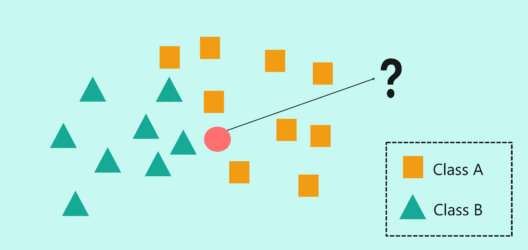

Image Source - https://www.newtechdojo.com/wp-content/uploads/2020/06/KNN-1.gif

# Topics Covered
1. Import necessary libraries
2. Load the diabetes dataset
3. Data Wrangling
4. Exploratory data analysis
5. k-nearest neighbors (k-NN) algorithm
6. How does k-NN work?
7. Classify diabetes dataset using k-NN
8. What is GridSerch CV and how to apply it?

# 1. Import necessary libraries

In [1]:
# Basic libraries for mathematical operations 
import numpy as np
import pandas as pd

# Basic libraries for plots
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns
sns.set(font_scale=1.5)

# Libraries related to k-NN and accuracy metrics
from sklearn.preprocessing import StandardScaler      ### to normalise data
from sklearn.model_selection import train_test_split  ### to split data to train and test data
from sklearn.neighbors import KNeighborsClassifier    ### import k-NN clasifier
from sklearn.metrics import accuracy_score            ### to find the accuracy score 
from sklearn.metrics import classification_report     ### to print classification report


# Libraries for Random forest ilustration
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, train_test_split

# 2. Load the diabetes dataset

In [2]:
diabetes_data = pd.read_csv('data/diabetes.csv')
diabetes_data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


# 3. Data Wrangling

**<font color='blue'> Start by reviewing the data info.</font>**

In [3]:
#Start by reviewing data info
diabetes_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


**<font color='blue'> Apply the describe function to the data.</font>**

In [4]:
# All data is numeric so no need to 'include' and 'datetime_is_numeric'
# diabetes_data.describe(include='all',datetime_is_numeric=True)

diabetes_data.describe(include='all',datetime_is_numeric=True)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


**<font color='blue'> Currently, the missing values in the dataset are represented as zeros. Replace the zero values in the following columns [`Glucose`,`BloodPressure`,`SkinThickness`,`Insulin`,`BMI`] with `NaN` .</font>**

In [5]:
# diabetes_data['Glucose'] = diabetes_data['Glucose'].replace(0,np.nan)
# diabetes_data['BloodPressure'] = diabetes_data['BloodPressure'].replace(0,np.nan)
# diabetes_data['SkinThickness'] = diabetes_data['SkinThickness'].replace(0,np.nan)
# diabetes_data['Insulin'] = diabetes_data['Insulin'].replace(0,np.nan)
# diabetes_data['BMI'] = diabetes_data['BMI'].replace(0,np.nan)

diabetes_data[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']] = \
    diabetes_data[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']].replace(0, np.nan)


In [6]:
# Print the number of missing values of each feature
diabetes_data.isna().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

In [7]:
diabetes_data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,NaN,33.6,0.627,50,1
1,1,85.0,66.0,29.0,NaN,26.6,0.351,31,0
2,8,183.0,64.0,NaN,NaN,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1


Replacing `NaN` values with any values is known a 'imputing'. There are various methods to impute values. The most commonly used method is to replace or impute the missing values using mean, median or mode (see this [article](https://vitalflux.com/pandas-impute-missing-values-mean-median-mode/)).

More sophisticated approaches are also available. Please see the following links for some the approaches:

* Miceforest: https://github.com/AnotherSamWilson/miceforest

* Scikit-learn: IterativeImputer class: https://scikit-learn.org/stable/modules/impute.html

* Statsmodel: https://www.statsmodels.org/dev/imputation.html

* missingpy library: https://pypi.org/project/missingpy/

Scikit-learn's `IterativeImputer` class is an excellent one with an exhaustive set of approaches available.

**<font color='blue'> Plot histograms of each column before imputing. </font>**

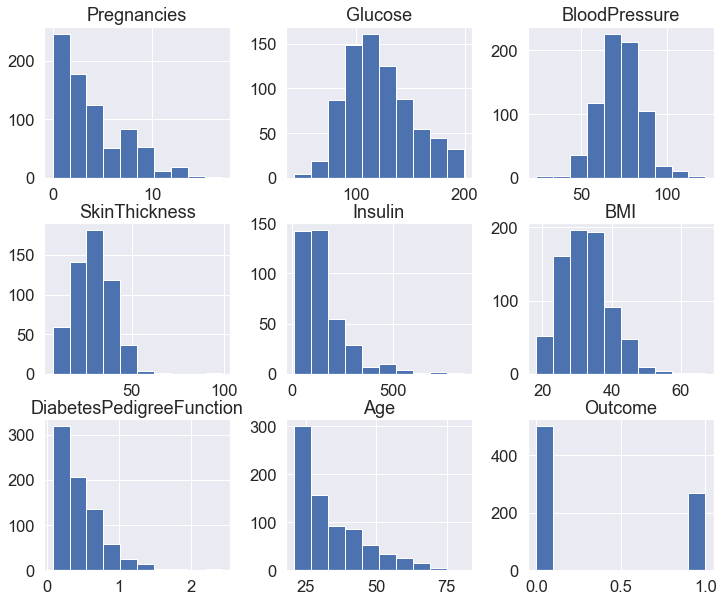

In [8]:
diabetes_data.hist(figsize=(12, 10));

**<font color='blue'> Replace the missing values with mean (for symmetric distribution) and median (for skewed distribution) as indicated below. </font>**

In [9]:
diabetes_data['Glucose'].fillna(diabetes_data['Glucose'].mean(), inplace = True)
diabetes_data['BloodPressure'].fillna(diabetes_data['BloodPressure'].mean(), inplace = True)
diabetes_data['SkinThickness'].fillna(diabetes_data['SkinThickness'].median(), inplace = True)
diabetes_data['Insulin'].fillna(diabetes_data['Insulin'].median(), inplace = True)
diabetes_data['BMI'].fillna(diabetes_data['BMI'].median(), inplace = True)

In [10]:
diabetes_data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,125.0,33.6,0.627,50,1
1,1,85.0,66.0,29.0,125.0,26.6,0.351,31,0
2,8,183.0,64.0,29.0,125.0,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1


# 4. Exploratory data analysis

**<font color='blue'> Plot histograms of each column after replacing nan. </font>**

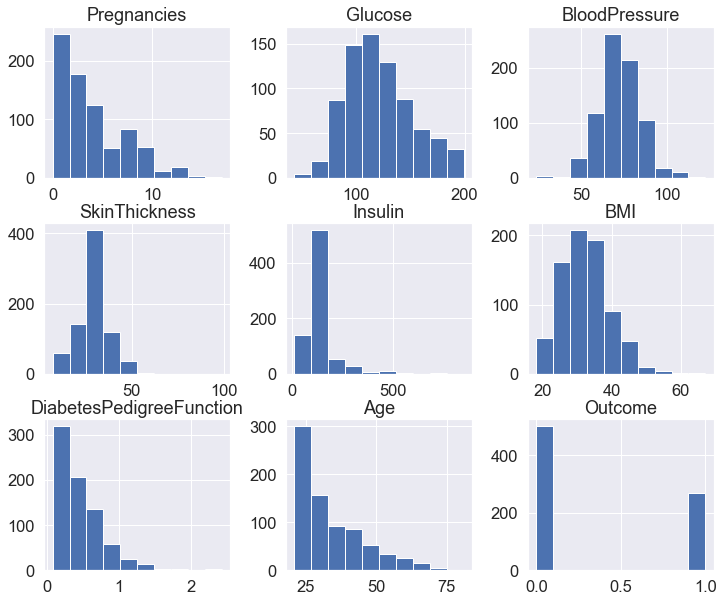

In [11]:
diabetes_data.hist(figsize=(12, 10));

**<font color='blue'> Plot the correlation matrix heatmap. </font>**

For further reading on 'Correlation' refer to https://www.analyticsvidhya.com/blog/2021/04/intuition-behind-correlation-definition-and-its-types/

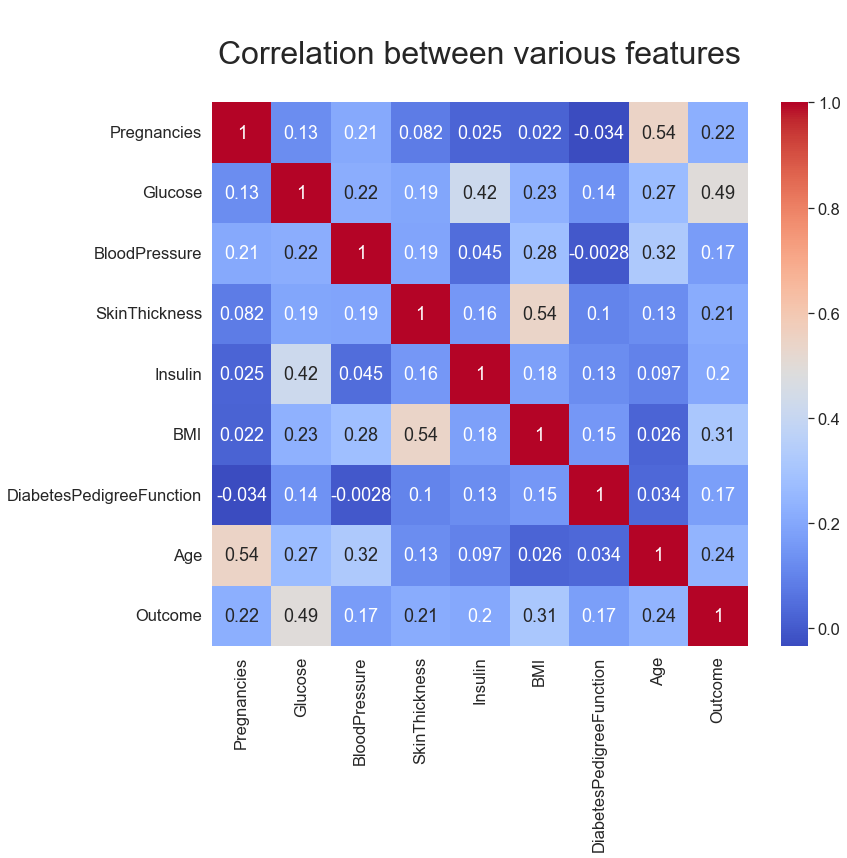

In [12]:
plt.figure(figsize=(12,10))
plt.title(f"\nCorrelation between various features\n", fontsize =32)
p=sns.heatmap(diabetes_data.corr(), annot=True,cmap ="coolwarm")

From the above plot, it can be observed `Glucose` shows the maximum correlation with `Outcome` with a correlation value of 0.49. The target variable `Outcome` is not really strongly correlated with any single feature, implying that the combined contribution of multiple features possibly contributes to diabetes.

Furthermore, we see that there is no strong correlation among the input features as well. This implies that we cannot really discrad any feature variables for our statistical model. 

Let us also use seaborn's pair plot to further understand how the `Outcome` is related to each of the input features.

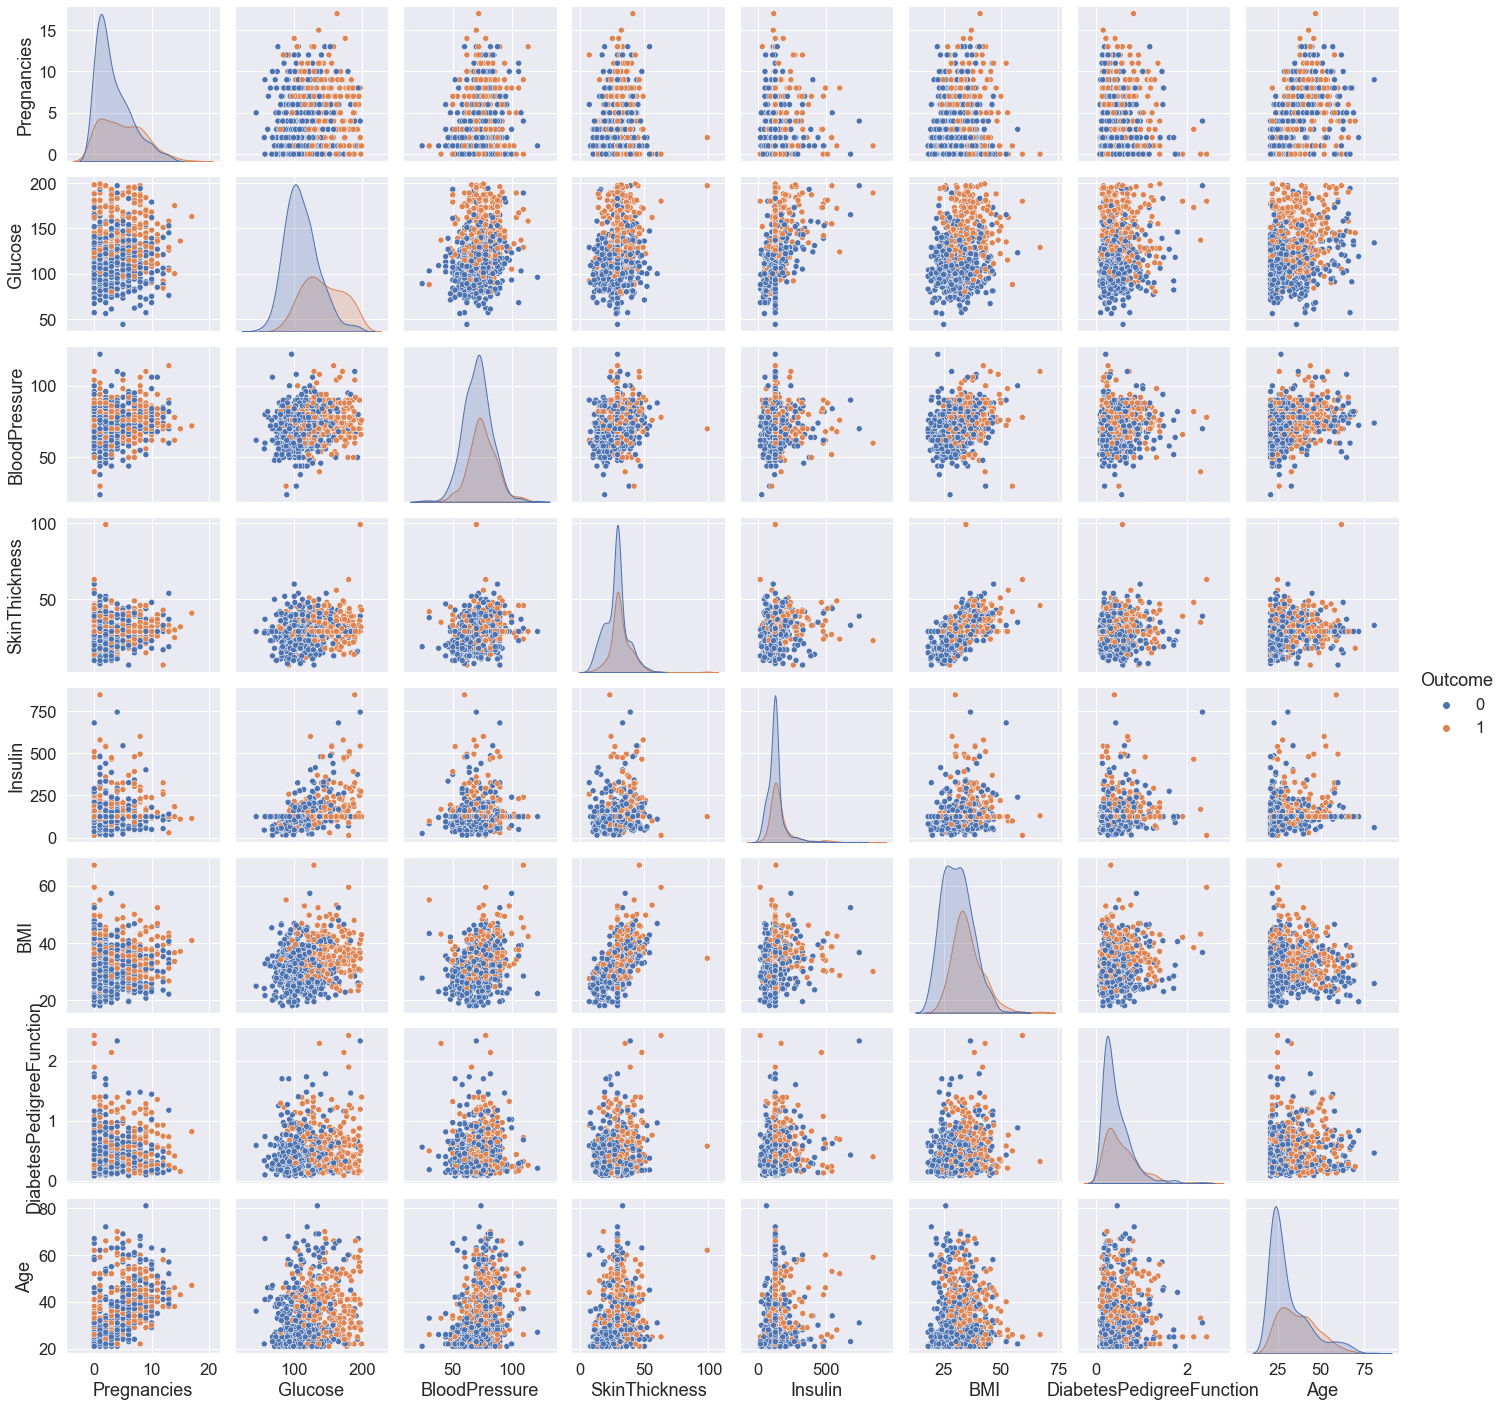

In [13]:
# pairplot with hue sex
sns.pairplot(diabetes_data, hue ='Outcome');

It is observed that two classes of `Output` data (`0` and `1`) are intermingled. So logistic regression or decession tree may not be a good machine learning model to use here.

So, we will employ the **k-nearest neighbor (k-NN)** classifier in this work.

# 5. What is k-NN Algorithm ?

1. The k-NN is one of the simplest Machine Learning algorithms based on Supervised Learning technique.
2. The k-NN algorithm can be used for Regression as well as for Classification but mostly it is used for the Classification problems.
3. It is also called a lazy learner algorithm because it does not learn from the training set immediately instead it stores the dataset and at the time of classification/regression, it performs an action on the dataset.


# 6.  How does k-NN work?

Step-1: Select the number `k` of the neighbors.

Step-2: Calculate a distance function (Euclidean distance is often used) of `k` number of neighbors. Please see this [article](https://dzone.com/articles/machine-learning-measuring) for more details.

Step-3: Take the `k` **nearest** neighbors as per the calculated Euclidean distance.

Step-4: For all the `k` nearest neighbors, count the number of the data points in each category.

Step-5: Assign the new data points to that category for which the number of the neighbor is maximum.

Step-6: Our model is ready!!!

For furthher details, you may refer to this [article](https://rapidminer.com/blog/k-nearest-neighbors-laziest-machine-learning-technique/).

**Suppose we have a new data point and we need to put it in the required category (see the image below)**.

First, we will choose a number of neighbors and assign it to `k`. Say, we choose `k=5`.

Next, we will calculate the Euclidean distance between the data points. The Euclidean distance is the distance between two points, which we have already studied in geometry and illustraed in the following picture.

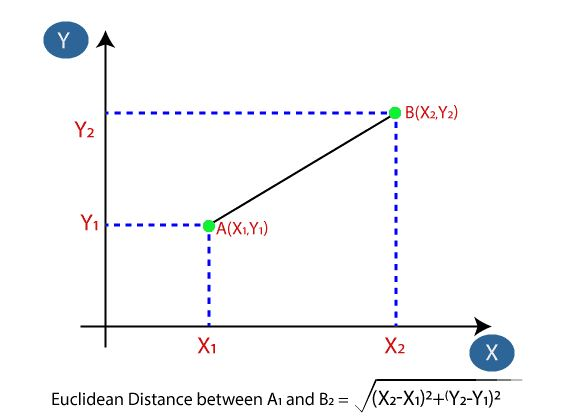

Image Reference - https://static.javatpoint.com/tutorial/machine-learning/images/k-nearest-neighbor-algorithm-for-machine-learning4.png

Please note that there are other ways to calculate the distance. You can refer to this link https://www.analyticsvidhya.com/blog/2020/02/4-types-of-distance-metrics-in-machine-learning/ or the [article](https://dzone.com/articles/machine-learning-measuring) we cited in Step 2 above for more details.


By calculating the Euclidean distance, say we get the `k=5` nearest neighbors with three nearest neighbors in category A and two nearest neighbors in category B, as demonstarted in the image below.

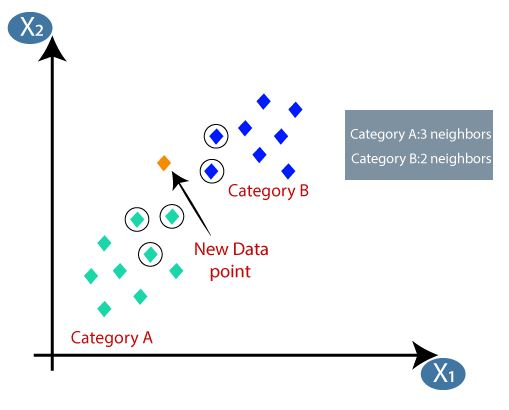

Image Reference - https://static.javatpoint.com/tutorial/machine-learning/images/k-nearest-neighbor-algorithm-for-machine-learning5.png

As we can see the 3 nearest neighbors are from category A, hence the new data point would be classifed to belong to category A.

# 7. Classify diabetes dataset using k-NN

We can use Scaling methods from sklearn in order to normalize the data. By scaling the data we bring uniformity (Normailze) in values accross different features of the data. Here https://datagy.io/pandas-normalize-column/ you can find different methods to normalize the data.

**Why do we need to scale data in k-NN?**. See this [explanation](https://stats.stackexchange.com/questions/287425/why-do-you-need-to-scale-data-in-knn).

For this example here - we will use Standard Scaler from sklearn.

**<font color='blue'> Define the `y` variable as the `Outcome` column and all the other features as `X`.</font>**

In [14]:
# Assign target variable to 'y' and all the other variables to X
y=diabetes_data['Outcome']
X = diabetes_data.drop('Outcome',axis=1) # here use 'drop' command to drop the target column

**<font color='blue'> Create a 70/30 train and test split. </font>**

Set `stratify=y` to preserve the original percentage of the complete dataset for each class in the training and test data sets.

In [15]:
# Let us first split the data into train and test by using train_test_split from sklearn

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 42, stratify=y)

**<font color='blue'> Using Sklearn, standarize the magnitude of the features by scaling the values. </font>**

Note: Don't forget to `.fit()` your scaler on `X_train` and then use that fitted scaler to `.transform()` the `X_test`. This is to avoid data leakage while we standardize your data.

In [16]:
scaler = StandardScaler().fit(X_train)

X_train = pd.DataFrame(scaler.transform(X_train)) #Scaled train data
X_test = pd.DataFrame(scaler.transform(X_test))   #Scaled test data

In [17]:
X_test.head()

,0,1,2,3,4,5,6,7
0,-0.263725,0.281051,0.472716,-0.713382,-0.741435,-0.626943,-0.470318,0.038086
1,0.035052,-0.420777,-0.677154,1.831637,-0.490347,0.324812,1.267301,-0.640821
2,2.126492,0.715516,1.786853,0.498532,0.099711,0.592493,-0.676324,1.480762
3,0.035052,0.748937,0.801250,0.377341,-0.163932,0.875045,0.219355,0.292676
4,1.230161,-0.554459,2.279654,0.862106,-0.163932,1.588861,-0.721108,0.971582


**<font color='blue'> Apply the `KNearestNeighbor()` classifier to classify the the data. </font>**

In [18]:
#Now import k-NN Classifer from sklearn to fit the training data and predict the test data

n_neighbors = 5

knn = KNeighborsClassifier(n_neighbors = n_neighbors) #choose k = 5 for preliminary investigation

knn.fit(X_train,y_train)

#Predict the test data 
pred = knn.predict(X_test)

In [19]:
#Check the accuracy of the test data 
print(f"test accuracy = {accuracy_score(y_test, pred)}")

test accuracy = 0.7445887445887446


              precision    recall  f1-score   support

           0       0.79      0.83      0.81       150
           1       0.65      0.58      0.61        81

    accuracy                           0.74       231
   macro avg       0.72      0.71      0.71       231
weighted avg       0.74      0.74      0.74       231



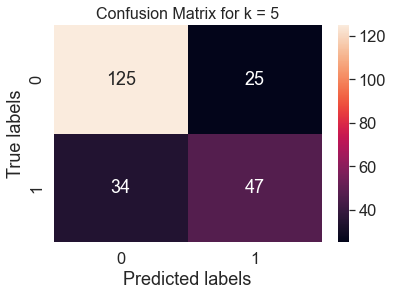

In [20]:
pl = confusion_matrix(y_test,pred)

ax= plt.subplot()
sns.heatmap(pl, annot=True, fmt='g')

# labels, title and ticks
ax.set_title( f"Confusion Matrix for k = {n_neighbors}", fontsize =16)
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 

# Print the classification report
print(classification_report(y_test,pred))

In [21]:
y.value_counts()

0    500
1    268
Name: Outcome, dtype: int64

Note that our data set has **class imbalance**. The k-NN algorithm gets affected by such class imbalance (see this [response](https://www.quora.com/Why-does-knn-get-effected-by-the-class-imbalance)). One way to address this concern is to use weighted k-NN. See this [response](https://www.quora.com/What-is-a-weighted-KNN) to learn why weighted k-NN may be useful.

Scikit-learn's `KNeighborsClassifier()` has a parameter `weights` that we can use to employ weighted k-NN. Let's see if our test accuracy improves by setting `weights = 'distance'` which weight points by the inverse of their distance. In this case, closer neighbors of a query point will have a greater influence than neighbors which are further away. 


test accuracy (weighted k-NN) = 0.7359307359307359

              precision    recall  f1-score   support

           0       0.78      0.82      0.80       150
           1       0.64      0.58      0.61        81

    accuracy                           0.74       231
   macro avg       0.71      0.70      0.70       231
weighted avg       0.73      0.74      0.73       231



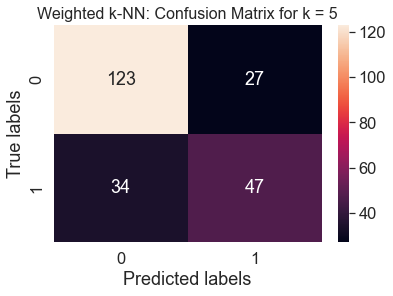

In [22]:
n_neighbors = 5

knn = KNeighborsClassifier(n_neighbors = n_neighbors, weights = 'distance')

knn.fit(X_train,y_train)

pred = knn.predict(X_test)

print(f"\ntest accuracy (weighted k-NN) = {accuracy_score(y_test, pred)}\n")

pl = confusion_matrix(y_test,pred)

ax= plt.subplot()
sns.heatmap(pl, annot=True, fmt='g')

# labels, title and ticks
ax.set_title( f"Weighted k-NN: Confusion Matrix for k = {n_neighbors}", fontsize =16)
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 

# Print the classification report
print(classification_report(y_test,pred))

**No improvement is observed for this dataset when using weighted k-NN.** So, we will stick to traditional k-NN with uniform weights. In this case, all points in each neighborhood are weighted equally.

**<font color='blue'> Let us next use a range of neighbor values, say, of 1-10, and apply the `KNearestNeighbor()` classifier to classify the data for further invesstigation. </font>**

In [23]:
test_scores = []
train_scores = []

for i in range(1,10):

    knn = KNeighborsClassifier(i)
    knn.fit(X_train,y_train)
    
    train_scores.append(knn.score(X_train,y_train))
    test_scores.append(knn.score(X_test,y_test))

**<font color='blue'> Print the train and test scores for each iteration.</font>**

In [24]:
# Print the test and train scores
scores_df = pd.DataFrame({'No. of Neighbors': range(1,10), 
                       'Train_scores': train_scores, 'Test_scores': test_scores})
scores_df

,No. of Neighbors,Train_scores,Test_scores
0,1,1.000000,0.718615
1,2,0.843575,0.722944
2,3,0.862197,0.740260
3,4,0.828678,0.740260
4,5,0.834264,0.744589
5,6,0.810056,0.740260
6,7,0.806331,0.735931
7,8,0.806331,0.748918
8,9,0.800745,0.744589


**<font color='blue'> Identify the number of neighbors that resulted in the max score in the training dataset. </font>**

In [25]:
print(f"Max train score {scores_df['Train_scores'].max()*100} % for k = {scores_df['Train_scores'].idxmax()+1}")

Max train score 100.0 % for k = 1


In [26]:
# #Identify the number of neighbors with the max training score
# max_train_score = max(train_scores)
# train_scores_ind = [i for i, v in enumerate(train_scores) if v == max_train_score]
# print('Max train score {} % and k = {}'.format(max_train_score*100,list(map(lambda x: x+1, train_scores_ind))))

**<font color='blue'> Identify the number of neighbors that resulted in the max score in the testing dataset. </font>**

In [27]:
print(f"Max test score {scores_df['Test_scores'].max()*100} % for k = {scores_df['Test_scores'].idxmax()+1}")

Max test score 74.89177489177489 % for k = 8


In [28]:
# #Identify the number of neighbors that resulted in the max score in the testing dataset.
# max_test_score = max(test_scores)
# test_scores_ind = [i for i, v in enumerate(test_scores) if v == max_test_score]
# print('Max test score {} % and k = {}'.format(max_test_score*100,list(map(lambda x: x+1, test_scores_ind))))

**<font color='blue'> Plot the train and test model performance by number of neighbors. </font>**

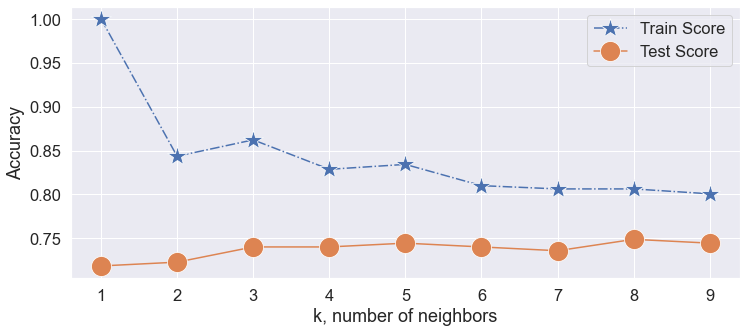

In [29]:
#Plot the train and test model performance by number of neighbors.
plt.figure(figsize=(12,5))
p = sns.lineplot(x=range(1,10),y=train_scores,marker='*',markersize=20, linestyle='-.', label='Train Score')
p = sns.lineplot(x=range(1,10),y=test_scores,marker='o', markersize=20, label='Test Score')
p.set(xlabel='k, number of neighbors', ylabel='Accuracy')
plt.show()

**<font color='blue'> Fit and score the best number of neighbors based on the plot. </font>**

In [30]:
#Fit and score the best number of neighbors based on the plot.
best_k = scores_df['Test_scores'].idxmax()+1
knn = KNeighborsClassifier(n_neighbors=best_k)
knn.fit(X_train,y_train)
knn.score(X_test,y_test)

0.7489177489177489

Observe the increase in accuracy (above) of the model from our preliminary case with `k=5`.

**<font color='blue'> Plot the confusion matrix for the model fit above. </font>**

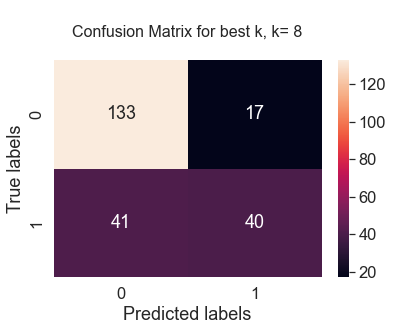

In [31]:
#Plot the confusion matrix for the model fit above.
y_pred = knn.predict(X_test)
pl = confusion_matrix(y_test,y_pred)

ax = plt.subplot()
sns.heatmap(pl, annot=True, fmt='g')

# labels, title and ticks
ax.set_title(f"\nConfusion Matrix for best k, k= {best_k}\n", fontsize =16)
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 

**<font color='blue'> Print the classification report </font>**

In [32]:
# Print the classification report
print(classification_report(y_test, y_pred, target_names = ['No diabetes','diabetes']))

              precision    recall  f1-score   support

 No diabetes       0.76      0.89      0.82       150
    diabetes       0.70      0.49      0.58        81

    accuracy                           0.75       231
   macro avg       0.73      0.69      0.70       231
weighted avg       0.74      0.75      0.74       231



#### Points of consideration while implementing k-NN algorithm

1. The k-NN algorithm is computationally expensive since it loads the entire dataset in the memory for classification. 
2. When the number of features of the dataset is very high it may suffer from curse of dimensionality and may perform poorly.

Another important aspect is the choice of the value of `k` that can produce different results for different values of `k`. Hence hyperparameter tuning of `k` becomes very important in producing a robust k-NN classifier. This is waht we tried to do above by using a set of different values of `k`. The model performance above isn't horrible, but what if we didn't consider a wide enough range of values in our neighbors for the k-NN?

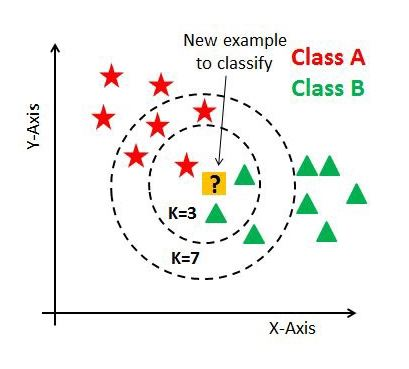 

Image Source - https://medium.com/analytics-vidhya/k-nearest-neighbor-the-maths-behind-it-how-it-works-and-an-example-f1de1208546c

An alternative to fitting a loop of models is to use a grid search to identify the proper number for `k`. It is a common practice to use a grid search method for all adjustable parameters for the machine learning algorithms. First, we define the grid — aka the range of values — to test in the parameter being optimized, and then compare the model outcome performance based on the different values in the grid.

In Sklearn we can use `GridSearchCV` to find the best value of `k` from the grid of model parameters. This will be shown below.

# 8. What is GridSerch CV?

Let us frist understand Grid Search Cross-Validation (CV).

GridSearchCV is the process of performing hyperparameter tuning in order to determine the optimal values for a given model by repeatedly changing the train and test data.

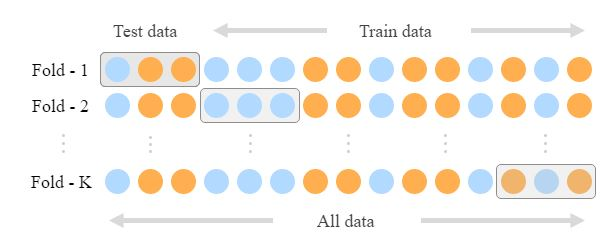

Image Source - https://www.philschmid.de/static/blog/k-fold-as-cross-validation-with-a-bert-text-classification-example/k-fold.svg

We first create a k-NN classifier instance and then prepare a range of values of hyperparameter `k` from 1 to 50 that will be used by GridSearchCV to find the best value of `k`.

Furthermore, we set our cross-validation batch sizes `cv = 5` and set scoring metrics as accuracy to measure the performance. Notice the `param_grid` is the range value to test and we apply cross validation with 5 folds to score each possible value of `n_neighbors`. You may refer to this [article](https://machinelearningknowledge.ai/knn-classifier-in-sklearn-using-gridsearchcv-with-example/) for some illustrated example.

In [33]:
#Model fitting with K-cross Validation and GridSearchCV 

knn = KNeighborsClassifier()

print(f"\nThe list of available parameters for grid search:\n {knn.get_params().keys()}\n") 

# defining parameter range
# k_range = list(range(1, 50))
# param_grid = dict(n_neighbors=k_range)
param_grid = {'n_neighbors':np.arange(1,25),
              'weights':['uniform', 'distance']
             }
  

# grid = GridSearchCV(knn, param_grid, cv=20, scoring='accuracy')
knn_cv= GridSearchCV(knn,param_grid,cv=5, scoring='accuracy')
knn_cv.fit(X_train,y_train)


The list of available parameters for grid search:
 dict_keys(['algorithm', 'leaf_size', 'metric', 'metric_params', 'n_jobs', 'n_neighbors', 'p', 'weights'])



GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24]),
                         'weights': ['uniform', 'distance']},
             scoring='accuracy')

**<font color='blue'> Print the best score and best parameter for `n_neighbors` and `weights`. </font>**

In [34]:
print("Best Score:" + ' ' + str(100*knn_cv.best_score_) + '%')
print("Best Parameters: " + str(knn_cv.best_params_))

Best Score: 75.61266874350987%
Best Parameters: {'n_neighbors': 9, 'weights': 'uniform'}


Here you can see that the ideal number of `n_neighbors` for this model is `9` for a **traditional k-NN** (because `weights = 'uniform'`) based on the grid search performed using `scoring = 'accuracy'`.

What about the corresponding accuracy for **traditional k-NN** based on the same parameters?


Train accuracy = 0.8007448789571695


Test accuracy = 0.7445887445887446



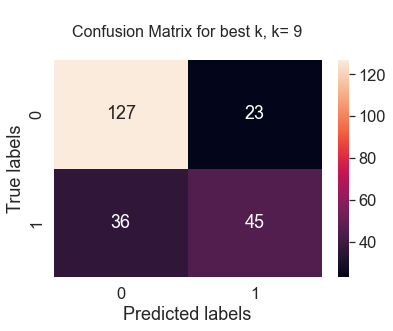

In [35]:
#Fit and score the best estimator based on the GridSeachCV
knn = KNeighborsClassifier(n_neighbors=knn_cv.best_params_['n_neighbors'], weights = knn_cv.best_params_['weights'])
# knn = KNeighborsClassifier(n_neighbors=knn_cv.best_params_['n_neighbors'])
knn.fit(X_train,y_train)
# knn.score(X_test,y_test)

#Check the accuracy of the train data 
print(f"\nTrain accuracy = {knn.score(X_train,y_train)}\n")

# Check the accuracy of the test data 
print(f"\nTest accuracy = {knn.score(X_test,y_test)}\n")

#Plot the confusion matrix for the model fit above.
y_pred = knn.predict(X_test)
pl = confusion_matrix(y_test,y_pred)

ax = plt.subplot()
sns.heatmap(pl, annot=True, fmt='g')

# labels, title and ticks
ax.set_title(f"\nConfusion Matrix for best k, k= {knn_cv.best_params_['n_neighbors']}\n", fontsize =16)
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 

In [36]:
# Print the classification report
print(classification_report(y_test, y_pred, target_names = ['No diabetes','diabetes']))

              precision    recall  f1-score   support

 No diabetes       0.78      0.85      0.81       150
    diabetes       0.66      0.56      0.60        81

    accuracy                           0.74       231
   macro avg       0.72      0.70      0.71       231
weighted avg       0.74      0.74      0.74       231



The `'recall'` is very poor for `diabetes` (or `1`) class for the test set. 

**What if we use `scoring='recall'` in our grid search?**

In [37]:
#Model fitting with K-cross Validation and GridSearchCV 

knn = KNeighborsClassifier()
param_grid = {'n_neighbors':np.arange(1,25),
              'weights':['uniform', 'distance']
             }
knn_cv= GridSearchCV(knn,param_grid,cv=5, scoring='recall')
knn_cv.fit(X_train,y_train)

print(f"\nBest Score (recall): {100*knn_cv.best_score_} %")
print(f"\nBest Parameters: {str(knn_cv.best_params_)}")


Best Score (recall): 61.94879089615932 %

Best Parameters: {'n_neighbors': 4, 'weights': 'distance'}



Test accuracy = 73.16017316017316%



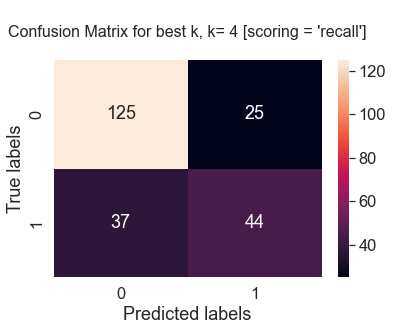

In [38]:
#Fit and score the best estimator based on the GridSeachCV with scoring = 'recall'
knn = KNeighborsClassifier(n_neighbors=knn_cv.best_params_['n_neighbors'], weights = knn_cv.best_params_['weights'])
knn.fit(X_train,y_train)

# Check the accuracy of the test data 
print(f"\nTest accuracy = {100*knn.score(X_test,y_test)}%\n")

#Plot the confusion matrix for the model fit above.
y_pred = knn.predict(X_test)
pl = confusion_matrix(y_test,y_pred)

ax = plt.subplot()
sns.heatmap(pl, annot=True, fmt='g')

# labels, title and ticks
ax.set_title(f"\nConfusion Matrix for best k, k= {knn_cv.best_params_['n_neighbors']} [scoring = 'recall']\n", fontsize =16)
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 

In [39]:
# Print the classification report
print(classification_report(y_test, y_pred, target_names = ['No diabetes','diabetes']))

              precision    recall  f1-score   support

 No diabetes       0.77      0.83      0.80       150
    diabetes       0.64      0.54      0.59        81

    accuracy                           0.73       231
   macro avg       0.70      0.69      0.69       231
weighted avg       0.72      0.73      0.73       231



**No significant improvement is noted.** This k-NN model with the imbalance data set does not turn out to be a good one to identify diabetes patients even though the test accuracy is about 73%.

**How about trying a different model?**

**<font color='blue'> Now, following the k-NN model, apply the grid search method to find the optimal number of estimators in a Randon Forest model. </font>**

See this [article](https://towardsdatascience.com/hyperparameter-tuning-the-random-forest-in-python-using-scikit-learn-28d2aa77dd74) for an illustrated example.

In [40]:
# ************ Random Forest Classifier using grid search for hyper-parameters ******************

# Number of trees in random forest

n_estimators = [int(x) for x in np.arange(20,601,20)]

param_grid = {'n_estimators': n_estimators}

print(f"The values that will be used for the grid search are:\n {param_grid}")

# Create a classifier by passing `random_state` to get reproducible results
rfc = RandomForestClassifier(random_state = 102)
# Instantiate the grid search model
rfc_cv = GridSearchCV(estimator = rfc, param_grid = param_grid, cv = 5, n_jobs = -1, verbose = 1)

The values that will be used for the grid search are:
 {'n_estimators': [20, 40, 60, 80, 100, 120, 140, 160, 180, 200, 220, 240, 260, 280, 300, 320, 340, 360, 380, 400, 420, 440, 460, 480, 500, 520, 540, 560, 580, 600]}


Here in the above code we are using 'Grid Search CV' only to identify the number of estimators. This approach can be exteneded to various other parameters like `max_depth`, `max_features`, etc

In [41]:
# Fit the classifier
print("\n*****Performing the Grid Search of the Hyperparameters*****")
rfc_cv.fit(X_train, y_train)

# Make predictions
y_pred = rfc_cv.predict(X_test)


*****Performing the Grid Search of the Hyperparameters*****
Fitting 5 folds for each of 30 candidates, totalling 150 fits


In [42]:
print(f"Best Score: {100*rfc_cv.best_score_} %")
print("Best Parameters: " + str(rfc_cv.best_params_))

Best Score: 76.90377293181032 %
Best Parameters: {'n_estimators': 80}


              precision    recall  f1-score   support

 No diabetes       0.78      0.87      0.82       150
    diabetes       0.69      0.56      0.62        81

    accuracy                           0.76       231
   macro avg       0.74      0.71      0.72       231
weighted avg       0.75      0.76      0.75       231



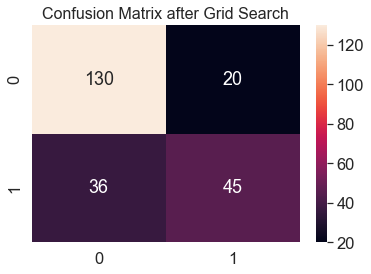

In [43]:
pl = confusion_matrix(y_test,y_pred)

plt.title( 'Confusion Matrix after Grid Search', fontsize =16)

sns.heatmap(pl, annot=True, fmt='g')

# Print the classification report to check the recall parameter 

print(classification_report(y_test,y_pred, target_names = ['No diabetes','diabetes']))

The random forest model is also not a significantly different from the k-NN model in terms of predicting the `'diabetes'` cases.